# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

# Problem Statement

In the fast-spaced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximize revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

# Objective

This project's main goal is to run A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares to those who pay with credit cards versus those who pay with cash.

# Research Question

Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv('yellow_tripdata_2020_01.csv')

In [3]:
df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01T00:28:15,2020-01-01T00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01T00:35:39,2020-01-01T00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01T00:47:41,2020-01-01T00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01T00:55:23,2020-01-01T01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01T00:01:58,2020-01-01T00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


# Exploratoty Data Analysis

In [4]:
df.shape

(6405008, 18)

## Feature Extraction

In [5]:
df.dtypes

vendorid                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
ratecodeid               float64
store_and_fwd_flag        object
pulocationid               int64
dolocationid               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

## Changing datatype from object to datetime

In [6]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [7]:
df.dtypes

vendorid                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
ratecodeid                      float64
store_and_fwd_flag               object
pulocationid                      int64
dolocationid                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

## Calculating extracted feature's value

In [8]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [9]:
df

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,0 days 00:04:48
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,0 days 00:07:25
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,0 days 00:06:11
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,0 days 00:04:51
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,0 days 00:02:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,0 days 00:31:00
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,0 days 01:16:00
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,0 days 00:27:50
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,0 days 00:22:39


## Converting days to minutes

In [10]:
df['duration'] = df['duration'].dt.total_seconds()/60

In [11]:
df

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


## Keeping important features only

In [12]:
df = df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [13]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


## Checking null values

In [14]:
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

## Checking the impact of these missing values on the whole dataset

In [15]:
65441/len(df)*100

1.021716132126611

Out of 100% data, only 1% is missing so we can easily drop this data

In [16]:
df.dropna(inplace = True)

In [17]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


## Changing datatype from float to int

In [18]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [19]:
df.dtypes

passenger_count      int64
payment_type         int64
fare_amount        float64
trip_distance      float64
duration           float64
dtype: object

## Checking for duplicated values

In [20]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


Out of 6339567 data, 3331706 is duplicated

In [21]:
df.drop_duplicates(inplace = True)

In [22]:
df.shape

(3007861, 5)

## Passenger_count and payment_type contribution on the data

In [23]:
df['passenger_count'].value_counts(normalize=True)

1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: passenger_count, dtype: float64

value_counts gives frequency of the category and normalize = True gives that frequency in percentage

0 is also a passenger count, which is technically not possible so we will not consider it further. Also, the passenger count of 6,7,8, and 9 have very less contribution on the data, they are outliers. Remove data where passenger_count is 0, 6, 7, 8, and 9

In [24]:
df['payment_type'].value_counts(normalize=True)

1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: payment_type, dtype: float64

In our hypothesis, we are only considering two payment modes i.e Cash and Card. So, we will remove the other payment modes-3,4, and 5

In [25]:
df = df[df['payment_type']<3]
df =df[(df['passenger_count']>0) & (df['passenger_count']<6)]

In [26]:
df.shape

(2780283, 5)

Data Left to study = 2780283

## Replacing payment_type to Card and Cash from 1 and 2  

In [27]:
df['payment_type'].replace([1,2],['Card','Cash'], inplace=True)

In [28]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000
6339564,1,Card,12.5,2.55,16.283333


In [29]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


As we can see, there are negative values in fare_amount, trip_distance, and duration which is not possible, data is wrong. So, we will remove the values which are negative

In [30]:
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

In [31]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


 Data left to study = 2748932

## Check Outliers

(array([2.748913e+06, 1.600000e+01, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e-02, 4.265090e+02, 8.530080e+02, 1.279507e+03,
        1.706006e+03, 2.132505e+03, 2.559004e+03, 2.985503e+03,
        3.412002e+03, 3.838501e+03, 4.265000e+03]),
 <BarContainer object of 10 artists>)

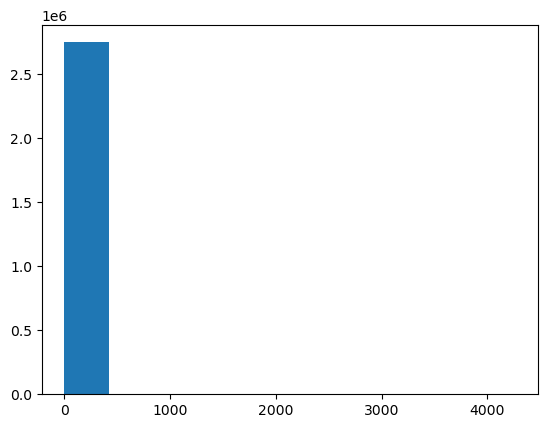

In [32]:
plt.hist(df['fare_amount'])

## Removing Outliers- 2 methods
### 1. Z-score
### 2. IQR

In [33]:
for col in ['fare_amount','trip_distance','duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    
    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR

    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

In [34]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


Data left to study = 2297908

## Distribution of fare_amount and trip_distance

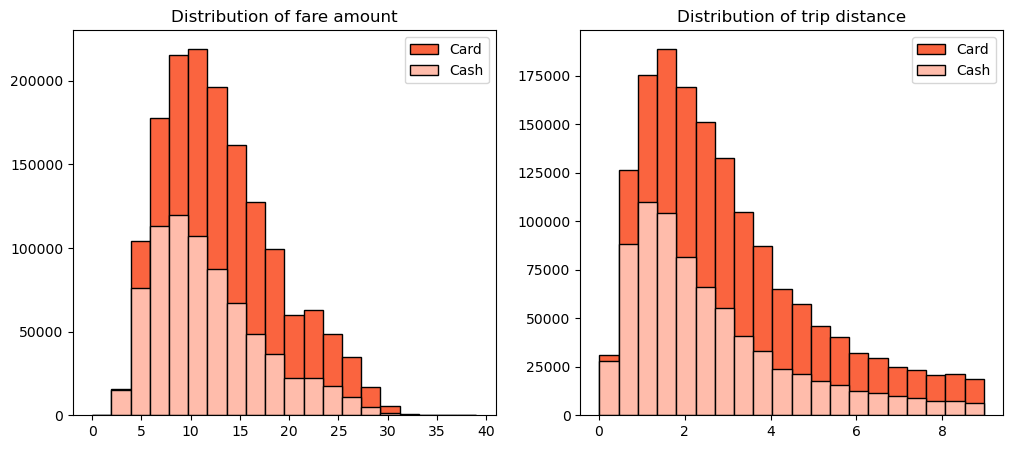

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'], histtype= 'barstacked', bins=20, edgecolor = 'k', color = '#FA643F',label = 
    'Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'], histtype= 'barstacked', bins=20, edgecolor = 'k', color = '#FFBCAB',label = 'Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type']=='Card']['trip_distance'], histtype= 'barstacked', bins=20, edgecolor = 'k', color = '#FA643F',label = 
    'Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'], histtype= 'barstacked', bins=20, edgecolor = 'k', color = '#FFBCAB',label = 'Cash')
plt.legend()
plt.show()

In [36]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance': ['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

Both mean and std of Card is more than Cash for both fare_amount as well as trip_distance. That means when so ever fare_amount and trip_distance are more, the customer tends to pay via card

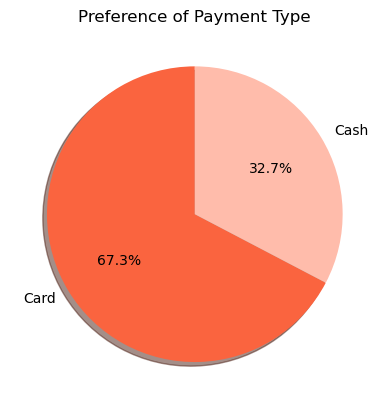

In [37]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True), labels = df['payment_type'].value_counts().index,
        startangle = 90, shadow = True, autopct = '%1.1f%%', colors = ['#FA643F','#FFBCAB'])
plt.show()

32.7% of the people use Cash and 67.3% of the people use Card

## Passenger Count Analysis

In [38]:
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'}, inplace = True)
passenger_count.reset_index(inplace = True)

In [39]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

In [40]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


## Creating Custom Dataframe

In [41]:
dfp = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
dfp['payment_type'] = ['Card','Cash']
dfp.iloc[0,1:] = passenger_count.iloc[0:5,-1]
dfp.iloc[1,1:] = passenger_count.iloc[5:,-1]
dfp

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


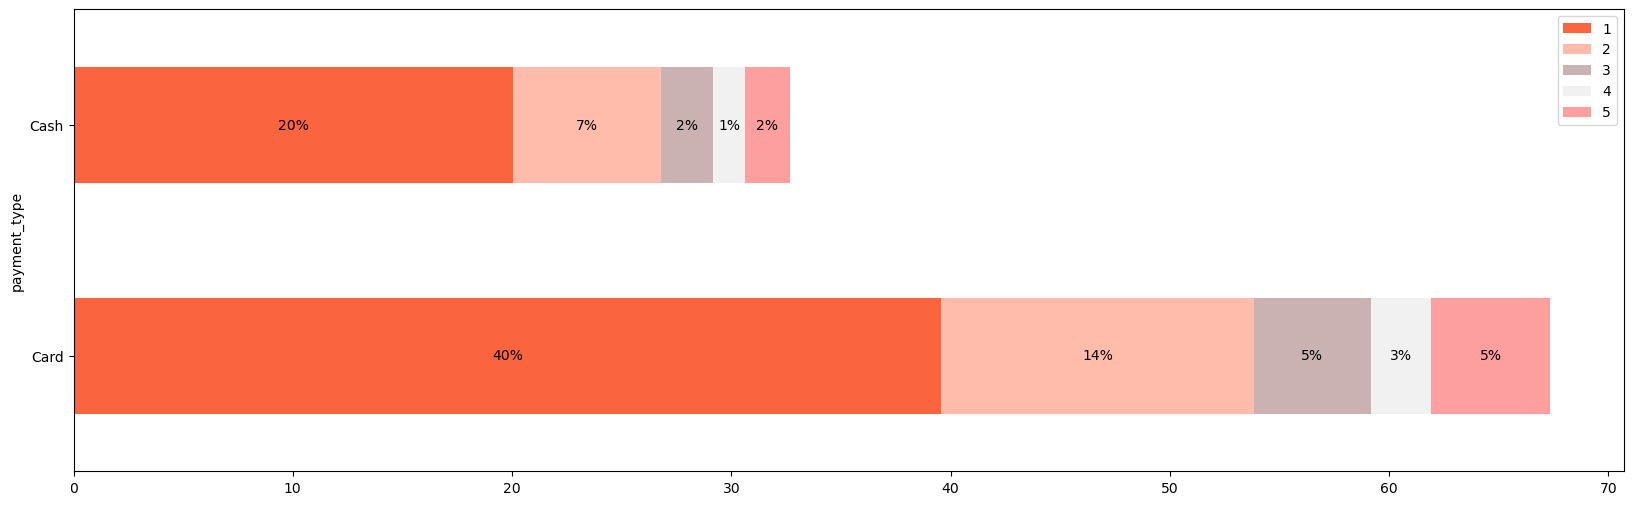

In [42]:
fig,ax = plt.subplots(figsize=(20,6))
dfp.plot(x= 'payment_type', kind = 'barh', stacked = True, ax=ax, color = ['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'])

#Add percentage text
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
           y + height / 2,
           '{:.0f}%'.format(width),
           horizontalalignment='center',
           verticalalignment='center')

Null Hypothesis: There is no difference in average fare between customers who use credit cards and customers who use cash

Alternate Hypothesis: There is a difference in average fare between customers who use credit cards and customer who use cash

## Which test to choose?
### 1. Chi-Square: Fare amount is continuous
### 2. Anova: Y variable should have more than 2 groups
### 3. Z-test: Mean and std dev should be known, large dataset, normally distributed data
### 4. T-test: Mean and std dev unknown, small dataset

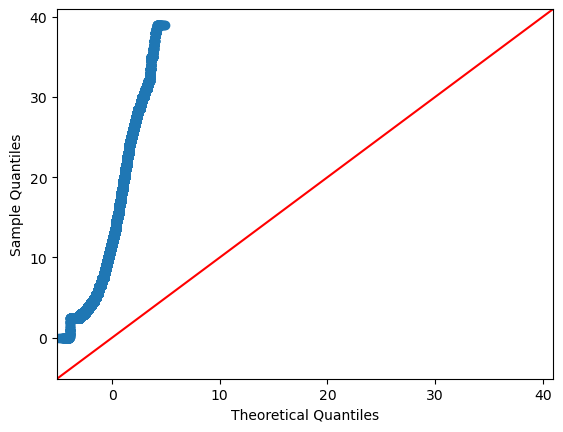

In [44]:
#to check whether a dataset is normally distributed visually, draw qqplot (quantile quantile plot). If the dataset aligns 
#properly on the diagonal then it means the data is normally distributed
sm.qqplot(df['fare_amount'], line = '45')
plt.show()

Data is not normally distributed, hence we will now use T-test

In [45]:
card_sample = df[df['payment_type'] == 'Card']['fare_amount']
cash_sample = df[df['payment_type'] == 'Cash']['fare_amount']

In [47]:
t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)
print('T statistic', t_stats, 'p-value',p_value)

T statistic 169.2111527245052 p-value 0.0


p-value = 0.0
Level of Significance = 0.05
p<level of significance
Hence, reject the null hypothesis and accept the hypothesis

## With a T-statistic value of 169.2 and a P-value of less than 0.05, we reject the Null Hypothesis, suggesting that there is indeed a significance difference in average fare between the  customers who use credit cards and customer who use cash